[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alok8663/Deep_Learning/blob/main/Supervised_Deep_Learning/RNN.ipynb)


# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:,1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [5]:
print(np.shape(X_train))

(1198, 60)


In [6]:
print(np.shape(y_train))

(1198,)


In [7]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [8]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [9]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [11]:
regressor=Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 132ms/step - loss: 0.0422
Epoch 2/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 5s 144ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 7s 180ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 6s 138ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [19]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [21]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

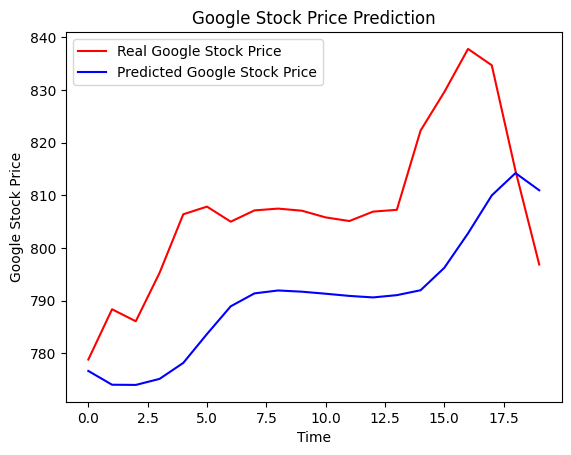

In [23]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()